In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import trustworthiness
import Template
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import LabelEncoder


Template = Template.Template()

# import the data from all sheets of the Excel file

df0 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=0)
df1 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=1)
df2 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=2)
df3 = pd.read_excel('Datos1_InteraccionesNIR.xlsx', sheet_name=3)

# Concatenate all sheets into a single DataFrame
df = pd.concat([df0, df1, df2, df3], ignore_index=True)

df0_NotFEH0 = df0[df0['Tratamiento'] != 'Fus_EH']

df_NotFEH0 = pd.concat([df0_NotFEH0, df1, df2, df3], ignore_index=True)

# Concatenate specific dataframes for analysis
df_Not0 = pd.concat([df1, df2, df3], ignore_index=True)

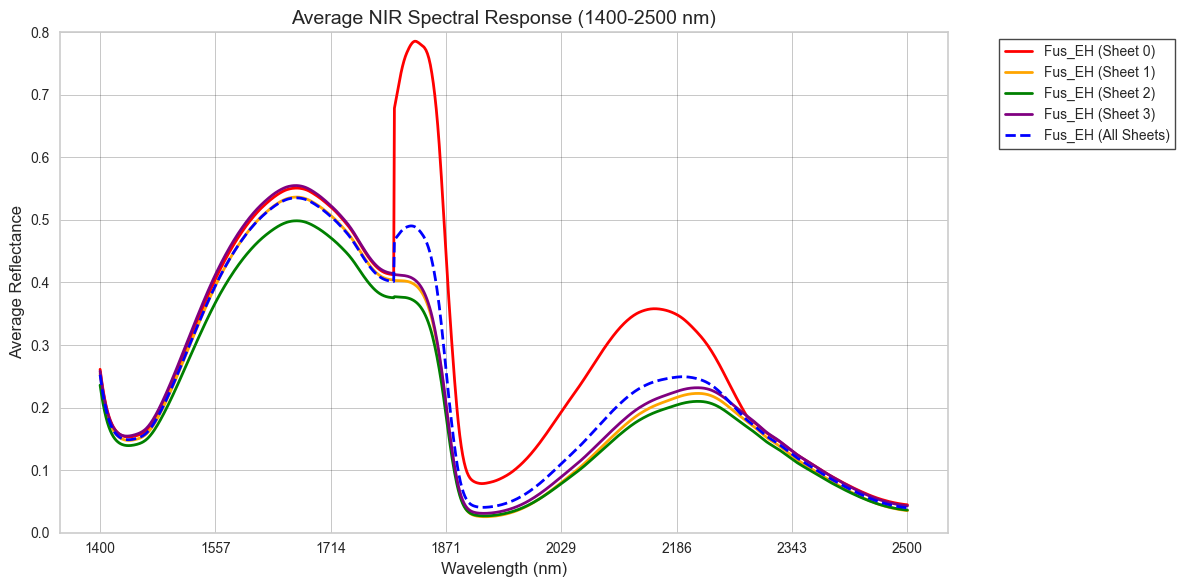

In [2]:
# Create a single figure for all plant indices
plt.figure(figsize=(12, 6))

# Filter wavelengths between 1400 and 2500
wavelengths = [int(col) for col in df.columns if str(col).isdigit() and 1400 <= int(col) <= 2500]

fus_df_0 = df0[df0['Tratamiento'] == 'Fus_EH'][wavelengths].mean()
plt.plot(wavelengths, fus_df_0, label='Fus_EH (Sheet 0)', color='red')

fus_df_1 = df1[df1['Tratamiento'] == 'Fus_EH'][wavelengths].mean()
plt.plot(wavelengths, fus_df_1, label='Fus_EH (Sheet 1)', color='orange')

fus_df_2 = df2[df2['Tratamiento'] == 'Fus_EH'][wavelengths].mean()
plt.plot(wavelengths, fus_df_2, label='Fus_EH (Sheet 2)', color='green')

fus_df_3 = df3[df3['Tratamiento'] == 'Fus_EH'][wavelengths].mean()
plt.plot(wavelengths, fus_df_3, label='Fus_EH (Sheet 3)', color='purple')


fus_df = df[df['Tratamiento'] == 'Fus_EH'][wavelengths]
plt.plot(wavelengths, fus_df.mean(), label='Fus_EH (All Sheets)', color='blue', linewidth=2, linestyle='--')



# Customize plot
plt.xlabel('Wavelength (nm)')
plt.ylabel('Average Reflectance')
plt.title('Average NIR Spectral Response (1400-2500 nm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 8))

# Set y-axis limits to zoom in on the differences
plt.ylim(0, 0.8) 

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

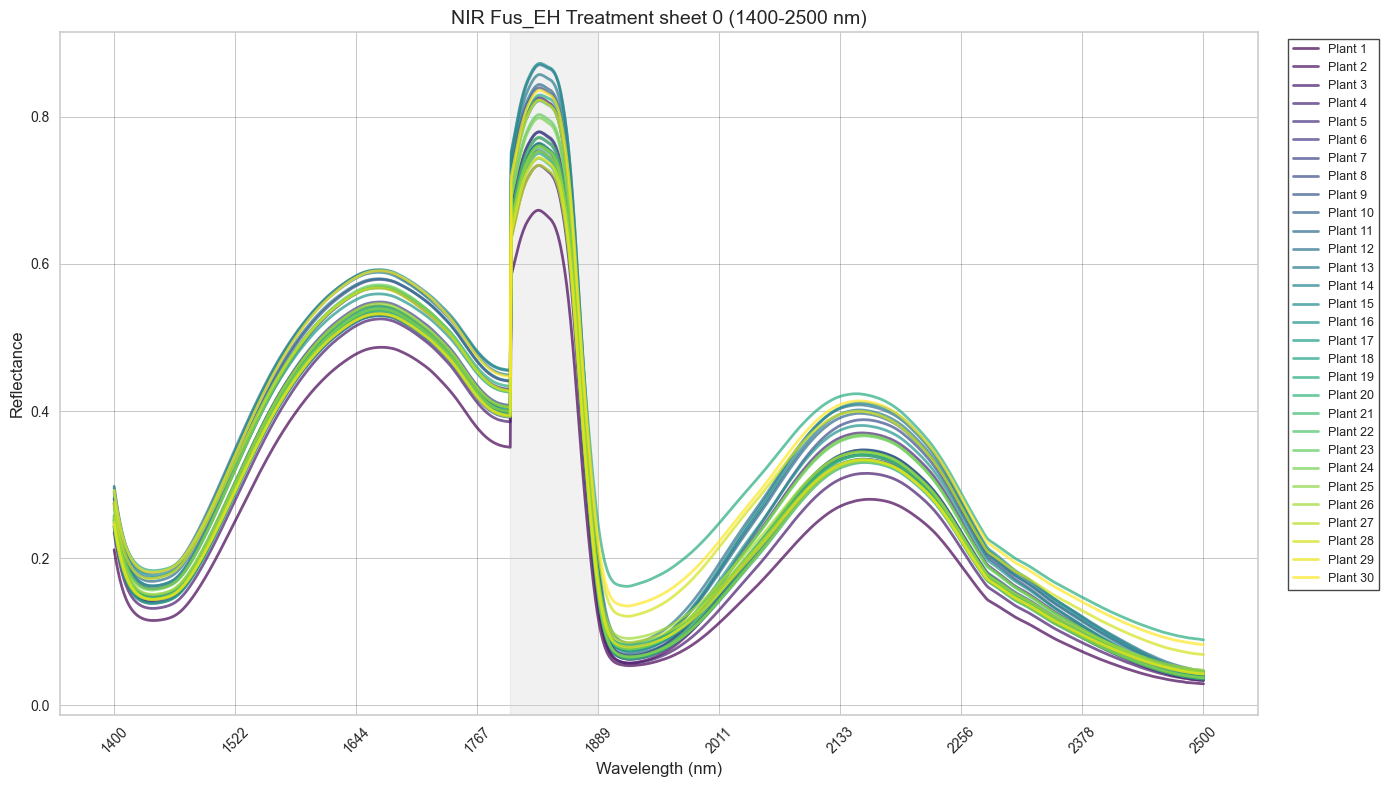

In [3]:
# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fus_EH treatment from df0
fus_plants = df0[df0['Tratamiento'] == 'Fus_EH']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.viridis(np.linspace(0, 1, len(fus_plants)))

# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df0[(df0['Tratamiento'] == 'Fus_EH') & (df0['Planta'] == plant)][wavelengths]
    
    if not plant_data.empty:
        plt.plot(wavelengths, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Fus_EH Treatment sheet 0 (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Highlight regions of interest 
plt.axvspan(1800, 1889, color='lightgray', alpha=0.3)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

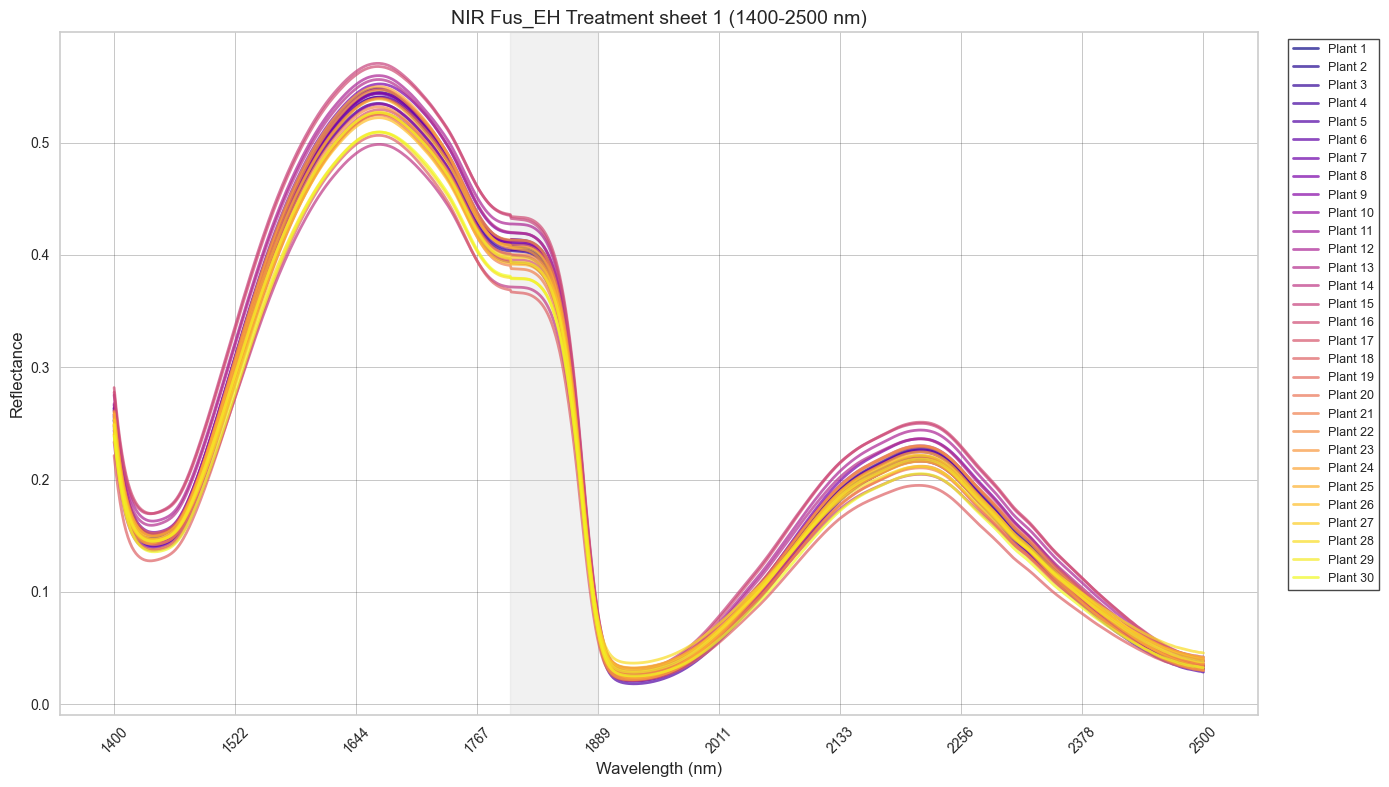

In [4]:
# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fus_EH treatment from df1
fus_plants = df1[df1['Tratamiento'] == 'Fus_EH']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.plasma(np.linspace(0, 1, len(fus_plants)))


# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df1[(df1['Tratamiento'] == 'Fus_EH') & (df1['Planta'] == plant)][wavelengths]
    
    if not plant_data.empty:
        plt.plot(wavelengths, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Fus_EH Treatment sheet 1 (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Highlight regions of interest 
plt.axvspan(1800, 1889, color='lightgray', alpha=0.3)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

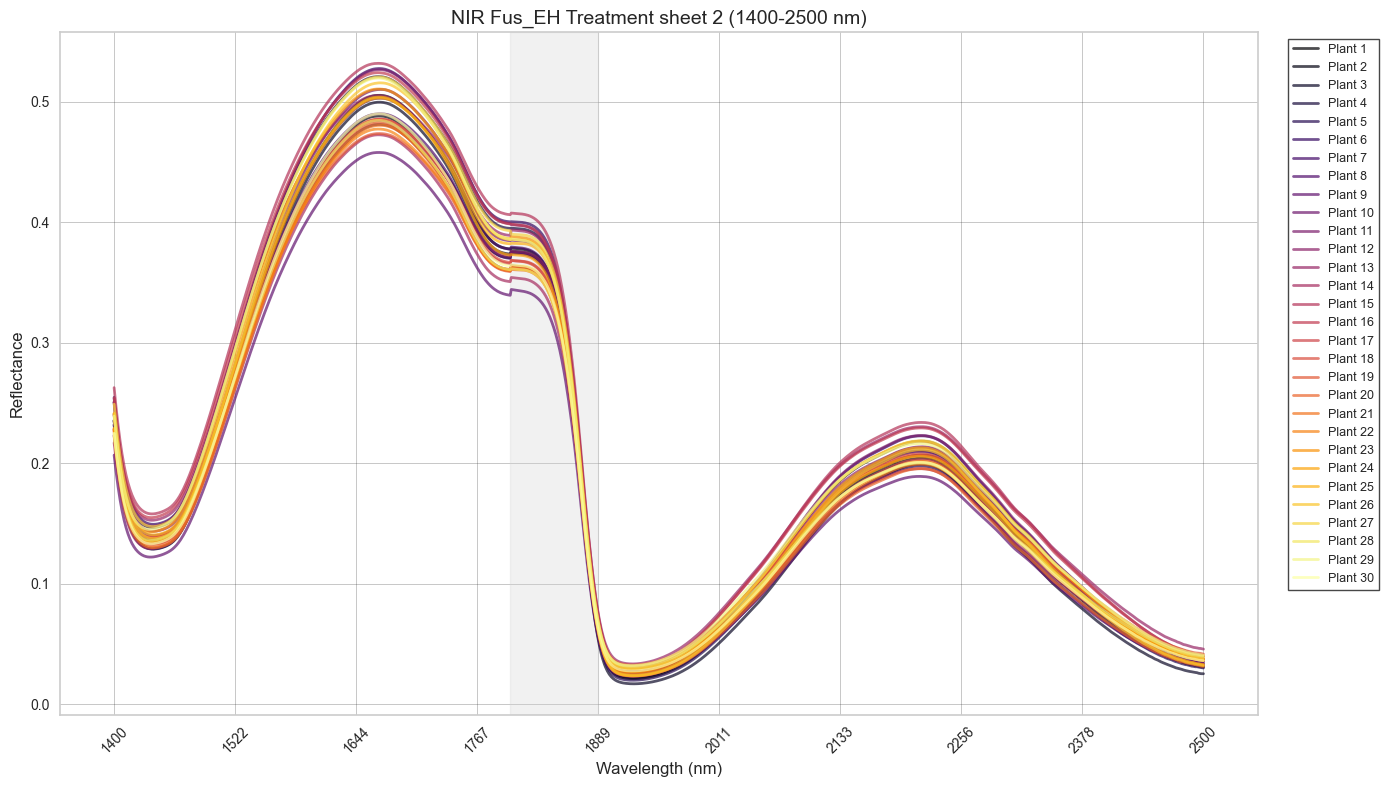

In [5]:
# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fus_EH treatment from df2
fus_plants = df2[df2['Tratamiento'] == 'Fus_EH']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.inferno(np.linspace(0, 1, len(fus_plants)))

# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df2[(df2['Tratamiento'] == 'Fus_EH') & (df2['Planta'] == plant)][wavelengths]
    
    if not plant_data.empty:
        plt.plot(wavelengths, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Fus_EH Treatment sheet 2 (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Highlight regions of interest 
plt.axvspan(1800, 1889, color='lightgray', alpha=0.3)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

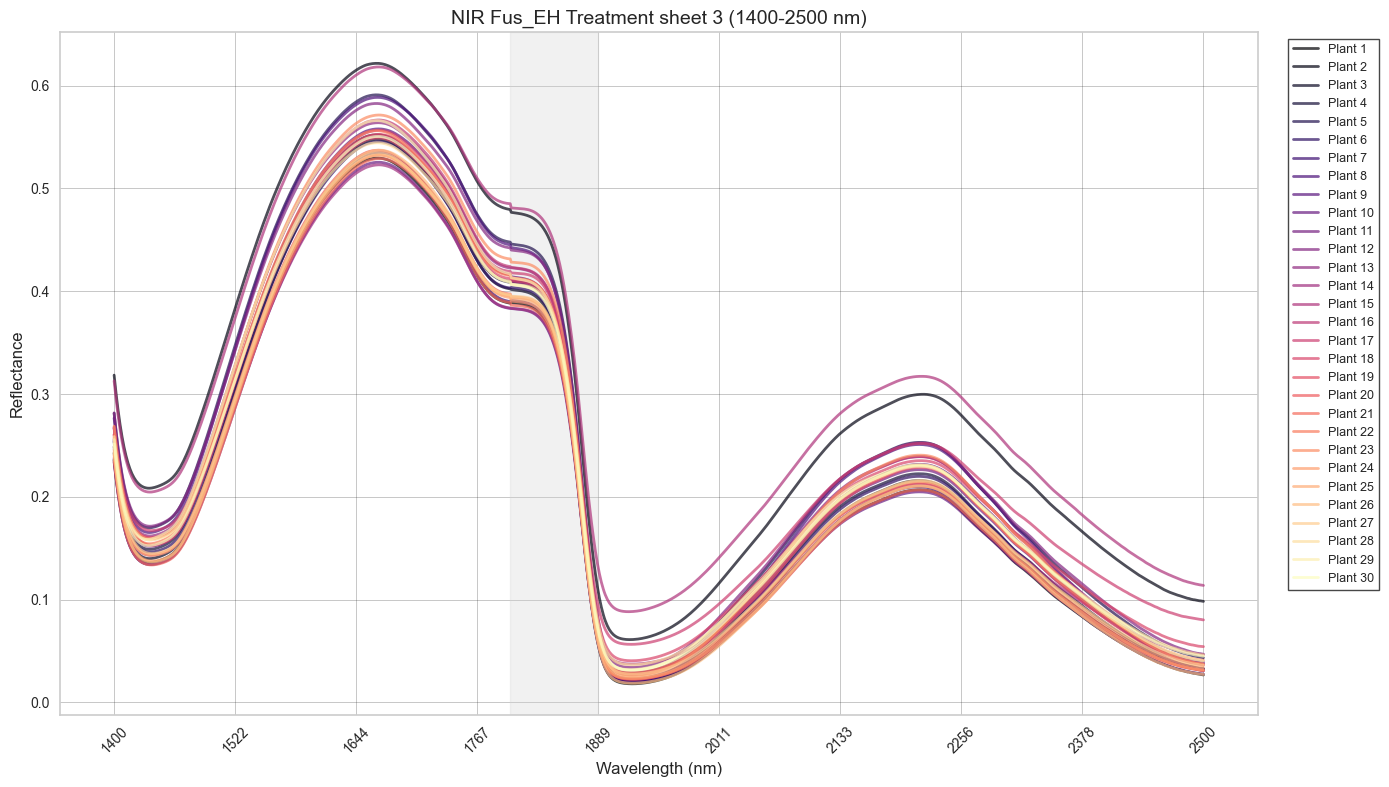

In [6]:
# Set up a larger figure with a good aspect ratio
plt.figure(figsize=(14, 8))

# Get all unique plant values in Fus_EH treatment from df3
fus_plants = df3[df3['Tratamiento'] == 'Fus_EH']['Planta'].unique()

# Create a colormap that will visually distinguish plants
colors = plt.cm.magma(np.linspace(0, 1, len(fus_plants)))

# Plot each plant's spectral signature
for i, plant in enumerate(fus_plants):
    plant_data = df3[(df3['Tratamiento'] == 'Fus_EH') & (df3['Planta'] == plant)][wavelengths]
    
    if not plant_data.empty:
        plt.plot(wavelengths, plant_data.values[0], 
                 color=colors[i], 
                 label=f'Plant {plant}',
                 alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('NIR Fus_EH Treatment sheet 3 (1400-2500 nm)', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis with evenly spaced ticks
plt.xticks(np.linspace(min(wavelengths), max(wavelengths), 10), rotation=45)

# Create a more user-friendly legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)

# Highlight regions of interest 
plt.axvspan(1800, 1889, color='lightgray', alpha=0.3)

# Add some padding around the plot
plt.tight_layout()

# Show the plot
plt.show()

## PCA and t-SNE without df0 (sheet 0)

### PCA

Explained variance by PC1: 67.33%
Explained variance by PC2: 25.08%
Total explained variance: 92.41%


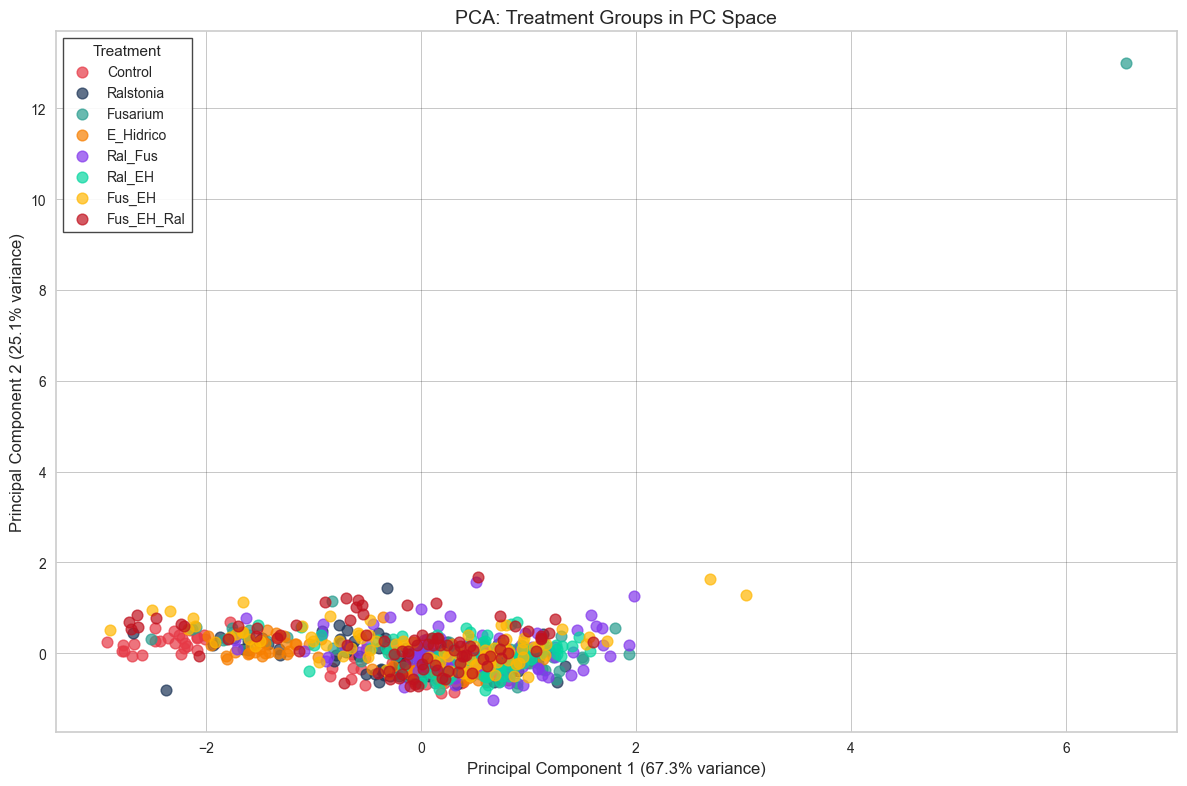

In [7]:
pca = PCA(n_components=2)

# The wavelength columns are from index 3 to the end
wavelength_data = df_Not0.iloc[:, 3:]

# Fit AND transform the data
pca_components = pca.fit_transform(wavelength_data)

# Check explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2%}")
print(f"Explained variance by PC2: {explained_variance[1]:.2%}")
print(f"Total explained variance: {explained_variance.sum():.2%}")

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    data=pca_components,
    columns=['PC1', 'PC2']
)

# Add categorical columns for plotting
pca_df['Tratamiento'] = df_Not0['Tratamiento'].values
pca_df['Planta'] = df_Not0['Planta'].values

# Reorder columns to put Tratamiento and Planta first
pca_df = pca_df[['Tratamiento', 'Planta', 'PC1', 'PC2']]

# Direct PCA visualization approach (without using template)
plt.figure(figsize=(12, 8))

# Plot each treatment as a separate group
for treatment in pca_df['Tratamiento'].unique():
    subset = pca_df[pca_df['Tratamiento'] == treatment]
    plt.scatter(subset['PC1'], subset['PC2'], 
                label=treatment, alpha=0.7, s=60)

# Add proper labels that reflect PCA meaning
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.1%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.1%} variance)')
plt.title('PCA: Treatment Groups in PC Space')
plt.legend(title='Treatment')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Explained variance by PC1: 67.33%
Explained variance by PC2: 25.08%
Explained variance by PC3: 4.04%
Total explained variance: 96.45%


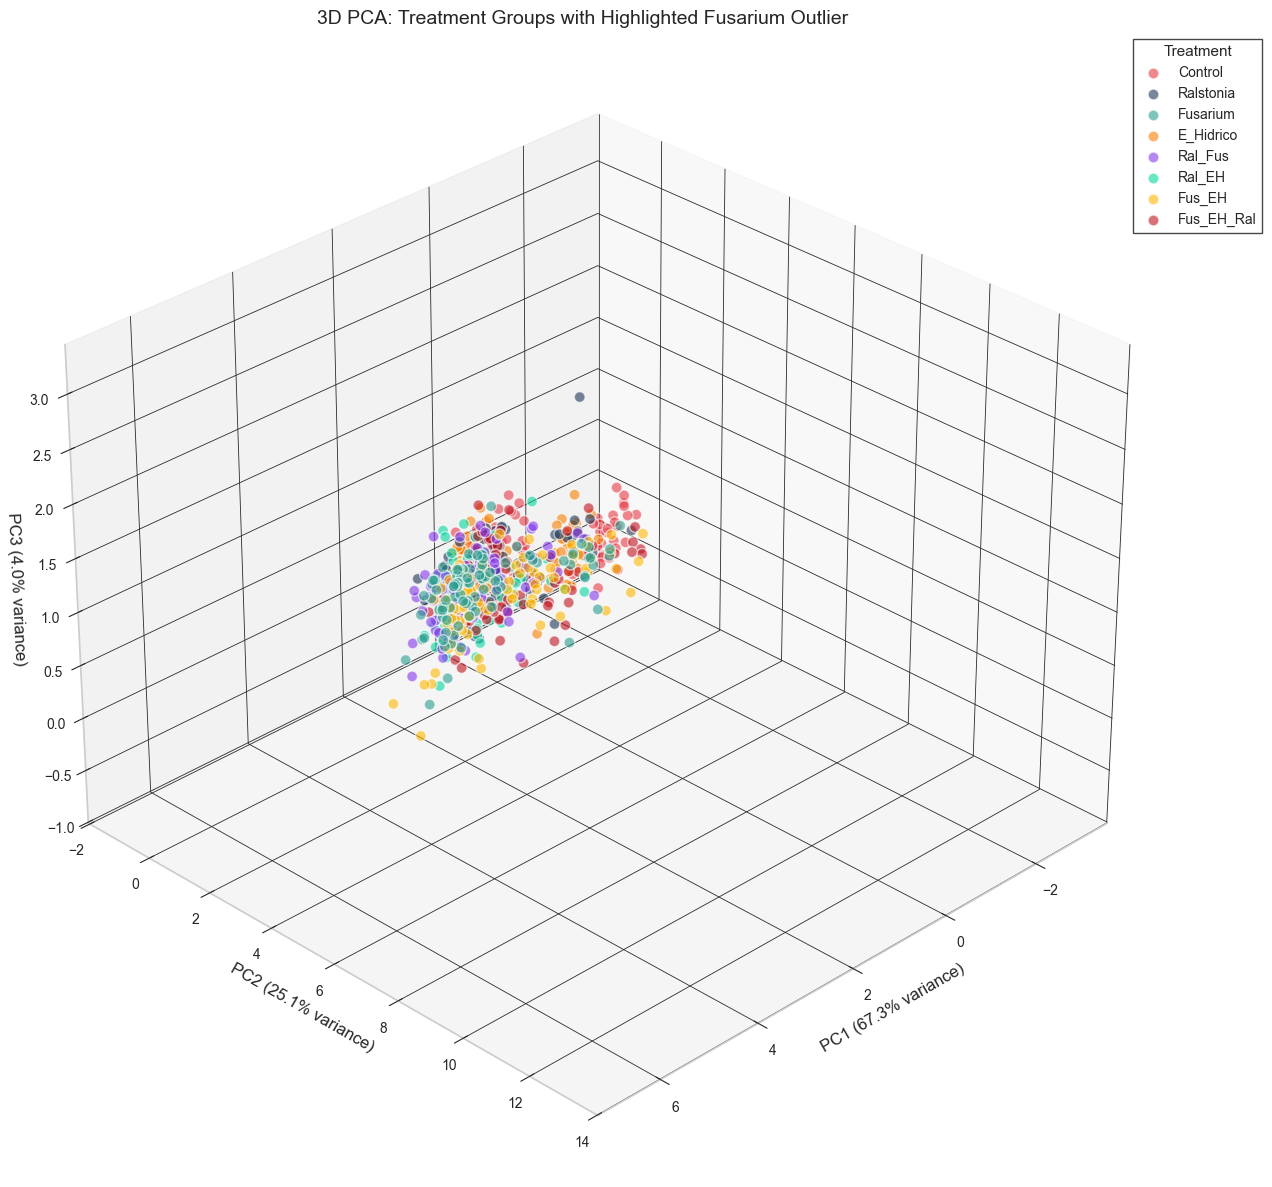

In [8]:
pca = PCA(n_components=3)

# The wavelength columns are from index 3 to the end
wavelength_data = df_Not0.iloc[:, 3:]

# Fit AND transform the data
pca_components_3d = pca.fit_transform(wavelength_data)

# Check explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2%}")
print(f"Explained variance by PC2: {explained_variance[1]:.2%}")
print(f"Explained variance by PC3: {explained_variance[2]:.2%}")
print(f"Total explained variance: {explained_variance.sum():.2%}")

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    data=pca_components_3d,
    columns=['PC1', 'PC2', 'PC3']
)

# Add categorical columns for plotting
pca_df['Tratamiento'] = df_Not0['Tratamiento'].values
pca_df['Planta'] = df_Not0['Planta'].values

# Reorder columns to put Tratamiento and Planta first
pca_df = pca_df[['Tratamiento', 'Planta', 'PC1', 'PC2', 'PC3']]


# Create the figure and 3D axes
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Get unique treatments for color mapping
treatments = pca_df['Tratamiento'].unique()

# First plot all non-Fusarium treatments
for treatment in treatments:
    subset = pca_df[pca_df['Tratamiento'] == treatment]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
                label=treatment, alpha=0.6, s=60, edgecolor='w')


# Set axis labels with explained variance
ax.set_xlabel(f'PC1 ({explained_variance[0]:.1%} variance)', fontsize=12)
ax.set_ylabel(f'PC2 ({explained_variance[1]:.1%} variance)', fontsize=12)
ax.set_zlabel(f'PC3 ({explained_variance[2]:.1%} variance)', fontsize=12)

# Set title and legend
ax.set_title('3D PCA: Treatment Groups with Highlighted Fusarium Outlier', fontsize=14)
ax.legend(title='Treatment', loc='upper right', bbox_to_anchor=(1.1, 1))

# Improve perspective
ax.view_init(elev=30, azim=45)
ax.dist = 5

# Add grid for better depth perception
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### T-SNE 

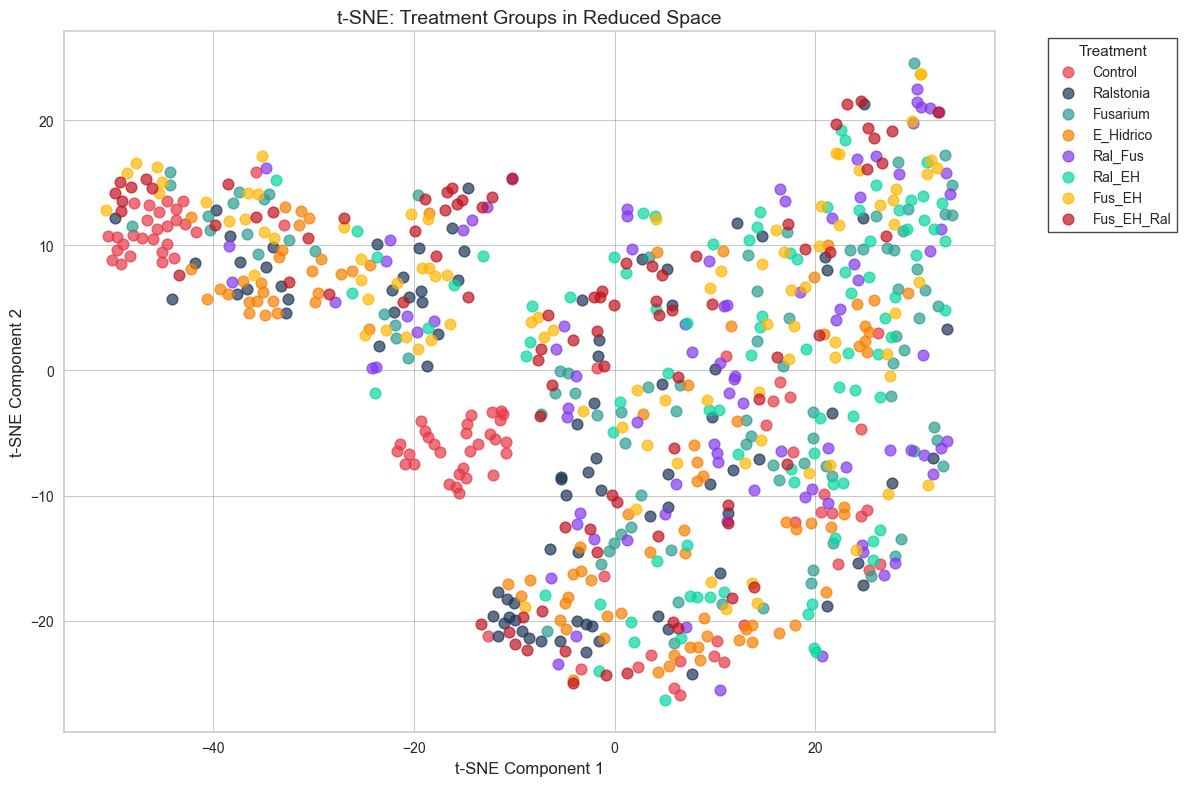

In [9]:
# The wavelength columns are from index 3 to the end
wavelength_data = df_Not0.iloc[:, 3:]

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(wavelength_data)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(
    data=tsne_results,
    columns=['t-SNE1', 't-SNE2']
)

# Add categorical columns for plotting
tsne_df['Tratamiento'] = df_Not0['Tratamiento'].values
tsne_df['Planta'] = df_Not0['Planta'].values

# Plot t-SNE results
plt.figure(figsize=(12, 8))

# Plot each treatment as a separate group
for treatment in tsne_df['Tratamiento'].unique():
    subset = tsne_df[tsne_df['Tratamiento'] == treatment]
    plt.scatter(subset['t-SNE1'], subset['t-SNE2'], 
                label=treatment, alpha=0.7, s=60)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE: Treatment Groups in Reduced Space')
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

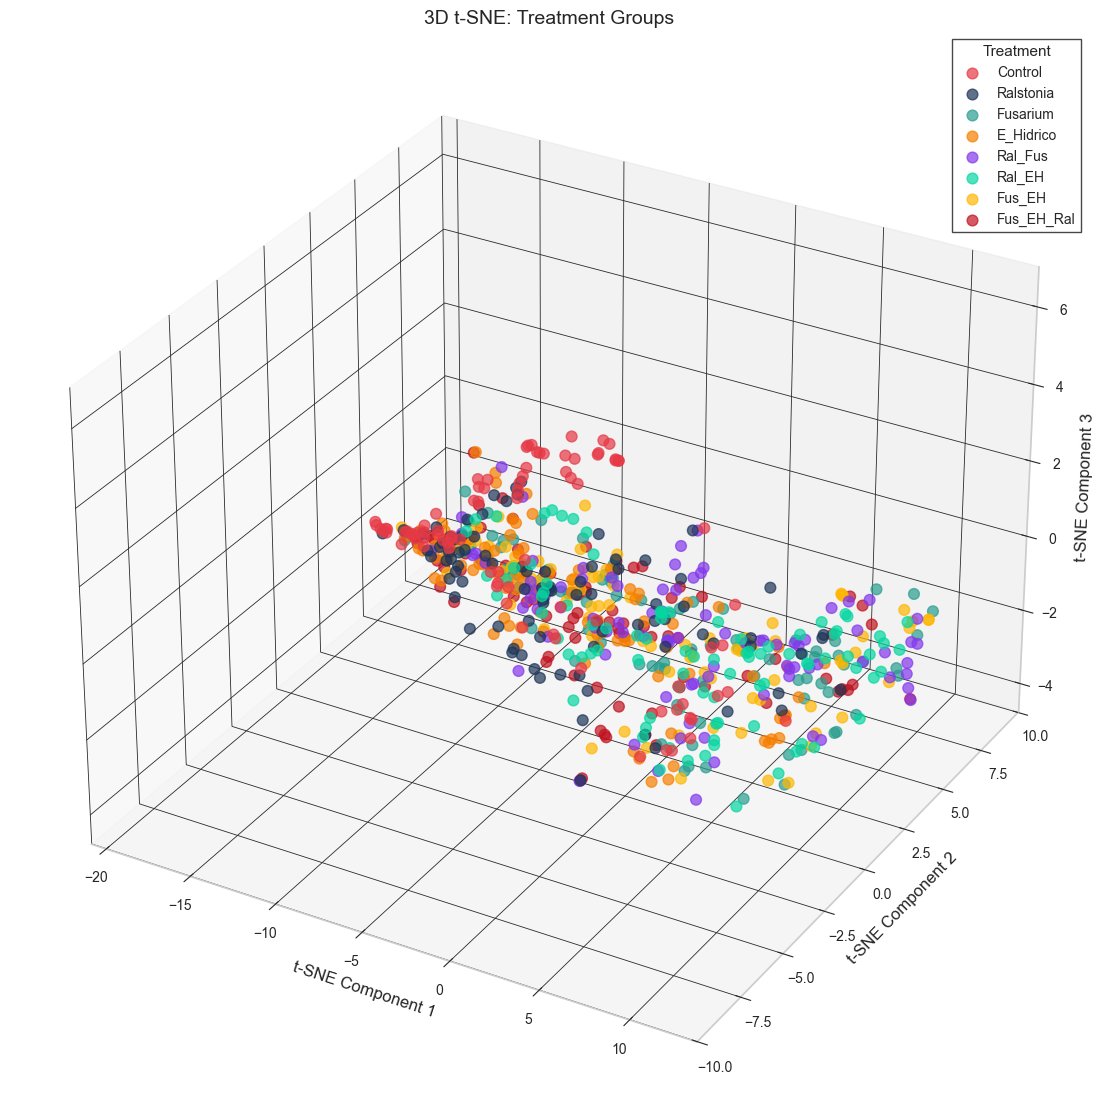

In [10]:
# Create the t-SNE model and transform the data
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_results_3d = tsne_3d.fit_transform(wavelength_data)

tsne_df = pd.DataFrame(
    tsne_results_3d, 
    columns=['Component 1', 'Component 2', 'Component 3']
)

tsne_df['Tratamiento'] = df_Not0['Tratamiento'].values 

# Create 3D plot
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(111, projection='3d')

# 3. Now, loop and plot using the new, clean 'tsne_df'
for treatment in tsne_df['Tratamiento'].unique():
    # Filter the new DataFrame
    subset = tsne_df[tsne_df['Tratamiento'] == treatment] 
    
    # Plot using the named columns
    ax.scatter(subset['Component 1'], subset['Component 2'], subset['Component 3'], 
               label=treatment, alpha=0.7, s=60)

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D t-SNE: Treatment Groups')
ax.legend(title='Treatment')
plt.show()

# Trustworthiness calculation

In [11]:
# Use the same parameters as you did for t-SNE for fair comparison
pca_trust_score = trustworthiness(wavelength_data, pca_components, n_neighbors=30)
print(f"PCA trustworthiness : {pca_trust_score:.4f}")

# Use the same parameters 
pca_3d_trust_score = trustworthiness(wavelength_data, pca_components_3d, n_neighbors=30)
print(f"PCA 3D trustworthiness : {pca_3d_trust_score:.4f}")

# Trustworthiness calculation
tsne_trust_score = trustworthiness(wavelength_data, tsne_results, n_neighbors=30)
print(f"Trustworthiness of t-SNE 2d: {tsne_trust_score:.4f}")

tsne_3d_trust_score = trustworthiness(wavelength_data, tsne_results_3d, n_neighbors=30)
print(f"Trustworthiness of t-SNE 3d: {tsne_3d_trust_score:.4f}")

PCA trustworthiness : 0.9758
PCA 3D trustworthiness : 0.9853
Trustworthiness of t-SNE 2d: 0.9767
Trustworthiness of t-SNE 3d: 0.9871


# Models without treatment 'Fus_EH' (df0)

In [12]:
# data treatment

# Data preparation for model production
X = df_NotFEH0.iloc[:, 3:].values  
y = df_NotFEH0['Tratamiento'].values  

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

## KNN without df0

In [13]:
# Define the parameter grid
param_grid = {
    'pca__n_components': [10, 20, 30],            
    'knn__n_neighbors': list(range(1, 10)),          
    'knn__weights': ['uniform', 'distance'],          
    'knn__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'knn__algorithm': ['auto','ball_tree', 'kd_tree', 'brute'], 
    'knn__leaf_size': [10, 30, 50]
}

pipeline = Pipeline([    
    ('pca', PCA()),                   
    ('knn', KNeighborsClassifier())  
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='balanced_accuracy')

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


c:\Users\ricar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [0.35647759 0.3675639  0.36637342 ... 0.34106626 0.34106626 0.34106626]
  warnings.warn(


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knn__algorithm': ['auto', 'ball_tree', ...], 'knn__leaf_size': [10, 30, ...], 'knn__metric': ['euclidean', 'manhattan', ...], 'knn__n_neighbors': [1, 2, ...], ...}"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_components,30


In [14]:
print(f"Best cross-validation score (Accuracy): {grid_search.best_score_:.4f}")
print("Best parameters found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"\nAccuracy on the test set: {accuracy:.4f}")

y_pred = best_model.predict(X_test)

Best cross-validation score (Accuracy): 0.4209
Best parameters found:
{'knn__algorithm': 'auto', 'knn__leaf_size': 10, 'knn__metric': 'manhattan', 'knn__n_neighbors': 6, 'knn__weights': 'distance', 'pca__n_components': 30}

Accuracy on the test set: 0.4409


<Figure size 1600x1200 with 0 Axes>

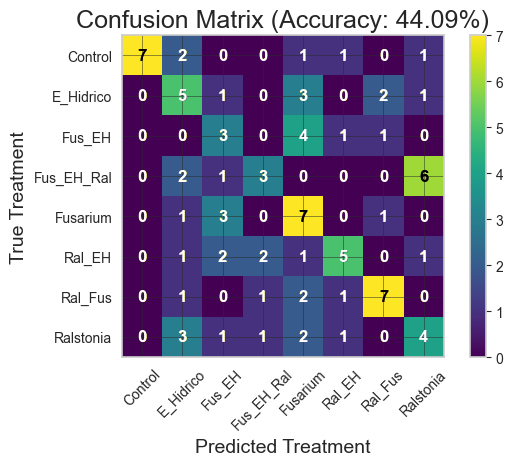

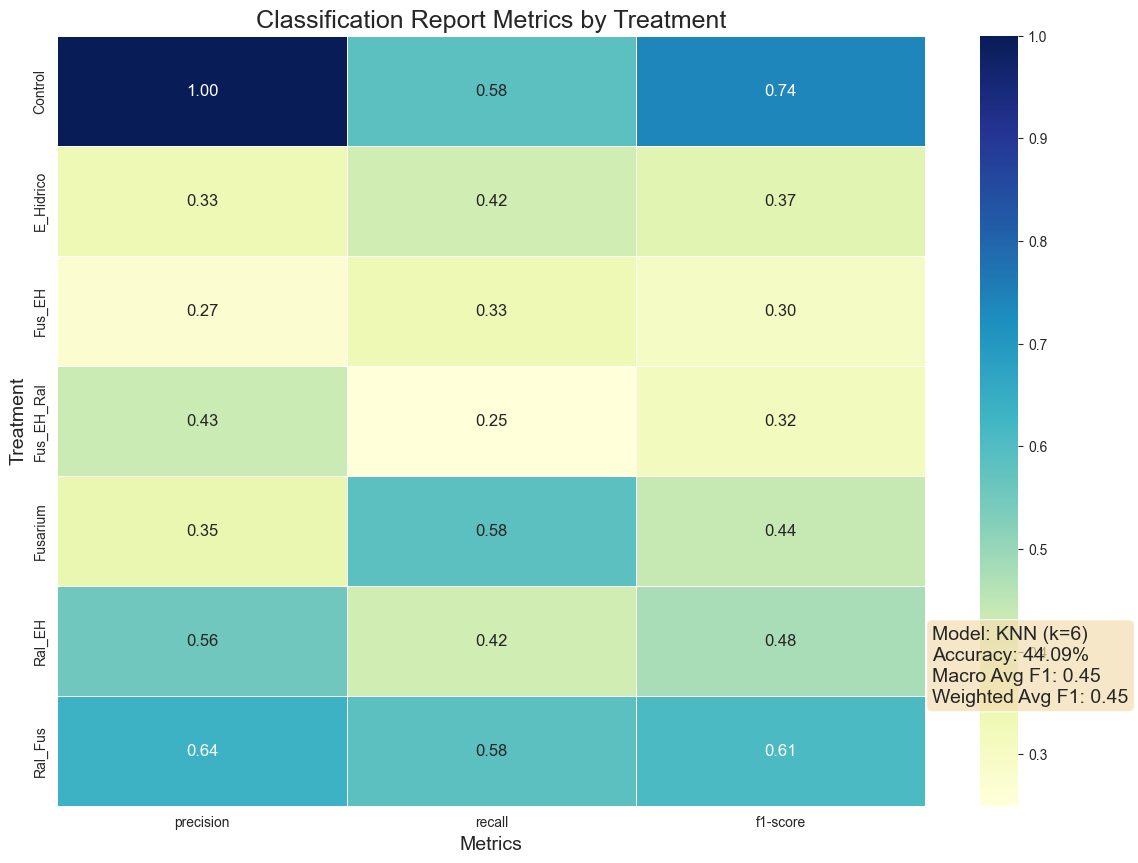

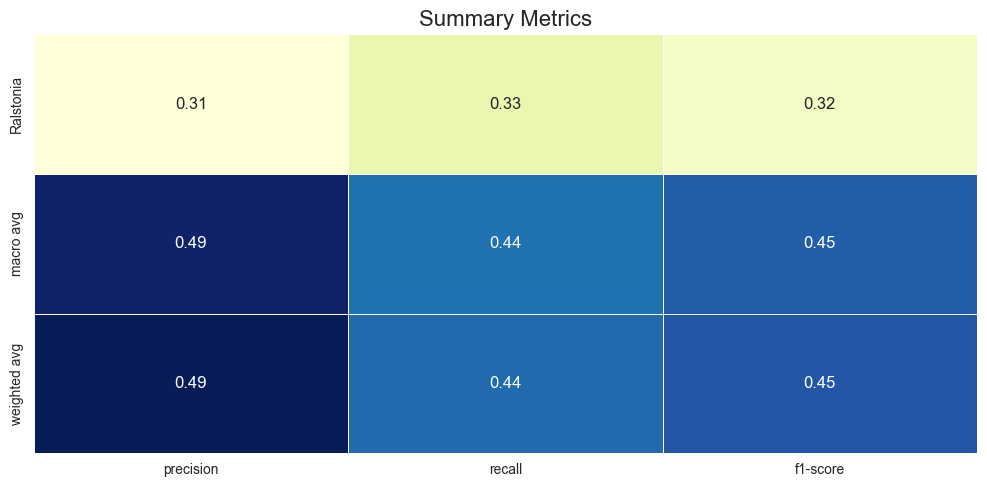

Overall model accuracy: 44.09%

Classification Report:
              precision    recall  f1-score   support

     Control       1.00      0.58      0.74        12
   E_Hidrico       0.33      0.42      0.37        12
      Fus_EH       0.27      0.33      0.30         9
  Fus_EH_Ral       0.43      0.25      0.32        12
    Fusarium       0.35      0.58      0.44        12
      Ral_EH       0.56      0.42      0.48        12
     Ral_Fus       0.64      0.58      0.61        12
   Ralstonia       0.31      0.33      0.32        12

    accuracy                           0.44        93
   macro avg       0.49      0.44      0.45        93
weighted avg       0.49      0.44      0.45        93



In [15]:
# ---------- PLOT 1: CONFUSION MATRIX ----------
plt.figure(figsize=(16, 12))

# Enhanced confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
labels = sorted(df['Tratamiento'].unique())

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='viridis', colorbar=True, xticks_rotation=45)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=18)
plt.xlabel('Predicted Treatment', fontsize=14)
plt.ylabel('True Treatment', fontsize=14)

# Add value annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text_color = 'white' if plt.cm.viridis(cm[i, j]/cm.max())[0] < 0.5 else 'black'
        plt.text(j, i, cm[i, j], ha='center', va='center', color=text_color, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ---------- PLOT 2: CLASSIFICATION REPORT ----------
plt.figure(figsize=(14, 10))

# Enhanced classification report visualization
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T
report_df = report_df.drop('accuracy', errors='ignore')  # Remove the accuracy row

# Create heatmap for classification metrics
ax = sns.heatmap(report_df.iloc[:-3, :3], annot=True, cmap='YlGnBu', fmt='.2f', 
        linewidths=0.5, cbar=True, annot_kws={"size": 12})
plt.title('Classification Report Metrics by Treatment', fontsize=18)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Treatment', fontsize=14)

# Add a text box with overall model performance
props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
textstr = (f'Model: KNN (k={grid_search.best_params_["knn__n_neighbors"]})\n'
           f'Accuracy: {accuracy:.2%}\n'
           f'Macro Avg F1: {report["macro avg"]["f1-score"]:.2f}\n'
           f'Weighted Avg F1: {report["weighted avg"]["f1-score"]:.2f}')
plt.gcf().text(0.75, 0.25, textstr, fontsize=14,
        verticalalignment='center', bbox=props)

# Add the summary metrics at the bottom
summary_df = report_df.iloc[-3:, :3]
plt.figure(figsize=(10, 5))
sns.heatmap(summary_df, annot=True, cmap='YlGnBu', fmt='.2f',
           linewidths=0.5, cbar=False, annot_kws={"size": 12})
plt.title('Summary Metrics', fontsize=16)

plt.tight_layout()
plt.show()

# Print additional performance details
print(f"Overall model accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## SVM without df0

In [16]:
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 30, 40],
    'svm__C': [0.01, 0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svm__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'svm__degree': [2, 3, 4],
    'svm__class_weight': ['balanced', None]
}

pipeline = Pipeline([    
    ('pca', PCA()),                   
    ('svm', SVC())  
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='balanced_accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


,estimator,"Pipeline(step...svm', SVC())])"
,param_grid,"{'pca__n_components': [5, 10, ...], 'svm__C': [0.01, 0.1, ...], 'svm__class_weight': ['balanced', None], 'svm__degree': [2, 3, ...], ...}"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_components,40


In [17]:
print(f"Best cross-validation score (Accuracy): {grid_search.best_score_:.4f}")
print("Best parameters found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"\nAccuracy on the test set: {accuracy:.4f}")

y_pred = best_model.predict(X_test)

Best cross-validation score (Accuracy): 0.5732
Best parameters found:
{'pca__n_components': 40, 'svm__C': 100, 'svm__class_weight': None, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}

Accuracy on the test set: 0.5484


<Figure size 1600x1200 with 0 Axes>

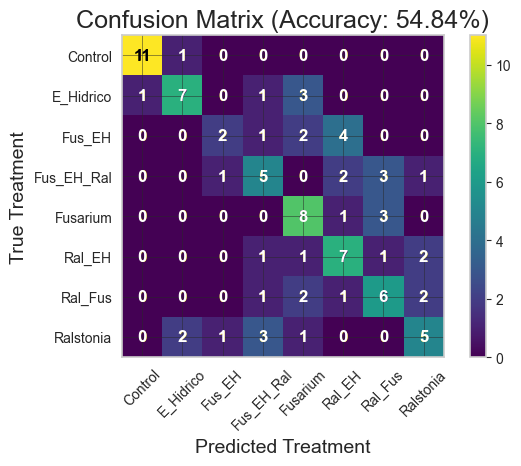

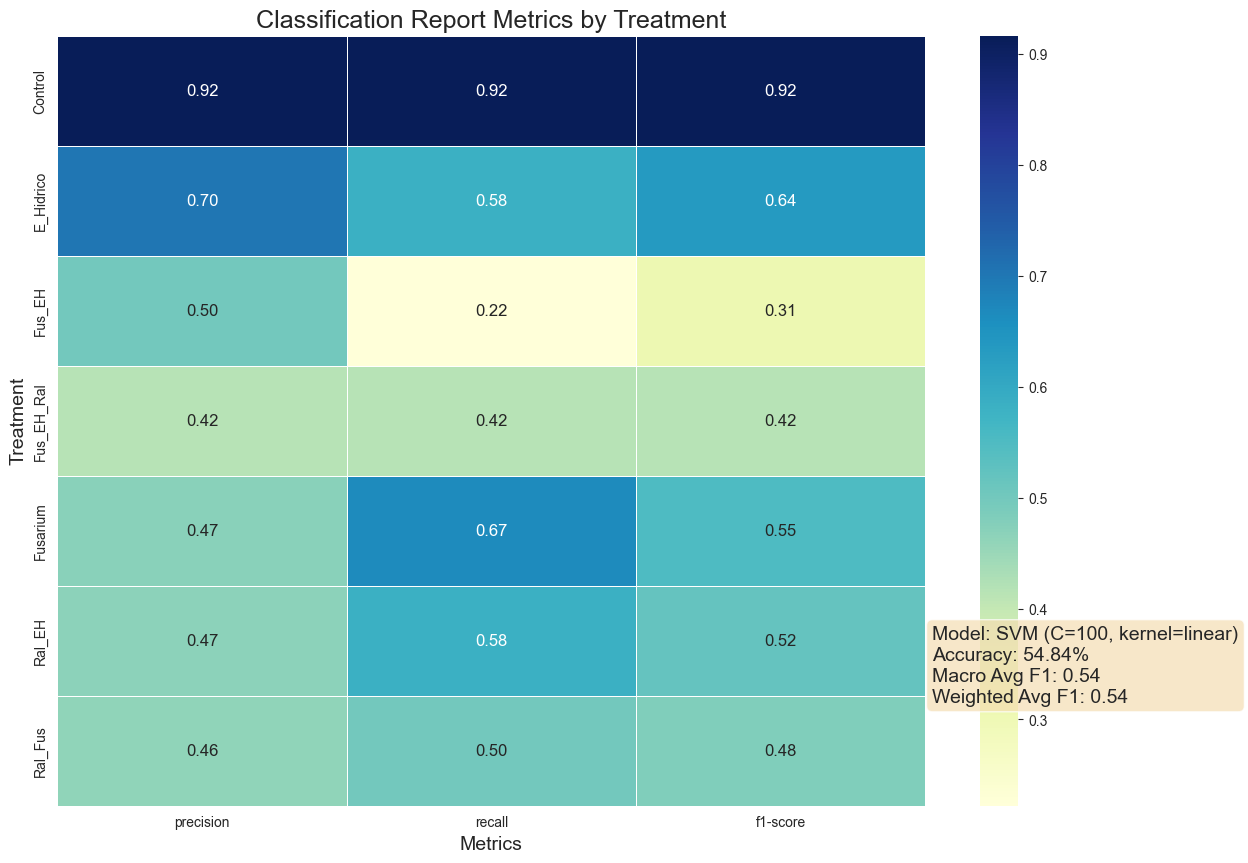

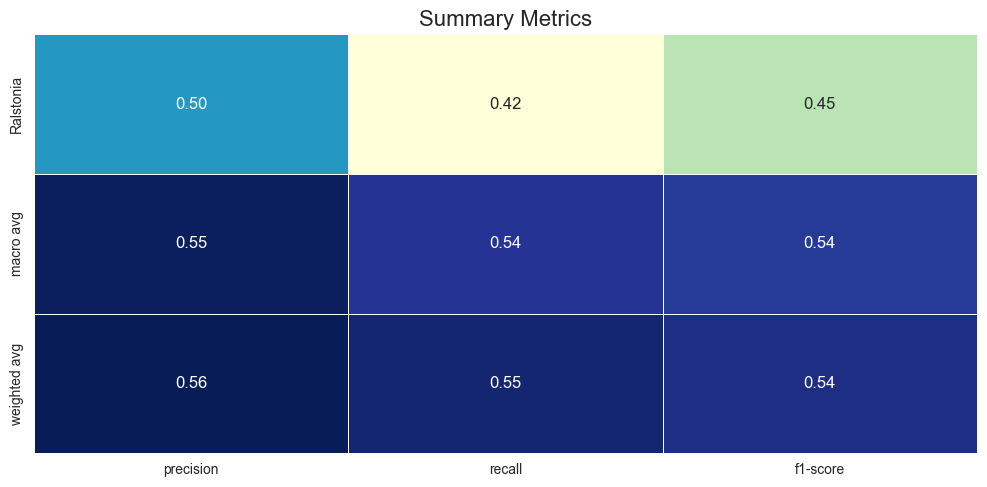

Overall model accuracy: 54.84%

Classification Report:
              precision    recall  f1-score   support

     Control       0.92      0.92      0.92        12
   E_Hidrico       0.70      0.58      0.64        12
      Fus_EH       0.50      0.22      0.31         9
  Fus_EH_Ral       0.42      0.42      0.42        12
    Fusarium       0.47      0.67      0.55        12
      Ral_EH       0.47      0.58      0.52        12
     Ral_Fus       0.46      0.50      0.48        12
   Ralstonia       0.50      0.42      0.45        12

    accuracy                           0.55        93
   macro avg       0.55      0.54      0.54        93
weighted avg       0.56      0.55      0.54        93



In [18]:
# ---------- PLOT 1: CONFUSION MATRIX ----------
plt.figure(figsize=(16, 12))

# Enhanced confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
labels = sorted(df['Tratamiento'].unique())

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='viridis', colorbar=True, xticks_rotation=45)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=18)
plt.xlabel('Predicted Treatment', fontsize=14)
plt.ylabel('True Treatment', fontsize=14)

# Add value annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text_color = 'white' if plt.cm.viridis(cm[i, j]/cm.max())[0] < 0.5 else 'black'
        plt.text(j, i, cm[i, j], ha='center', va='center', color=text_color, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ---------- PLOT 2: CLASSIFICATION REPORT ----------
plt.figure(figsize=(14, 10))

# Enhanced classification report visualization
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T
report_df = report_df.drop('accuracy', errors='ignore')  # Remove the accuracy row

# Create heatmap for classification metrics
ax = sns.heatmap(report_df.iloc[:-3, :3], annot=True, cmap='YlGnBu', fmt='.2f', 
        linewidths=0.5, cbar=True, annot_kws={"size": 12})
plt.title('Classification Report Metrics by Treatment', fontsize=18)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Treatment', fontsize=14)

# Add a text box with overall model performance
props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
textstr = (f'Model: SVM (C={grid_search.best_params_["svm__C"]}, kernel={grid_search.best_params_["svm__kernel"]})\n'
           f'Accuracy: {accuracy:.2%}\n'
           f'Macro Avg F1: {report["macro avg"]["f1-score"]:.2f}\n'
           f'Weighted Avg F1: {report["weighted avg"]["f1-score"]:.2f}')
plt.gcf().text(0.75, 0.25, textstr, fontsize=14,
        verticalalignment='center', bbox=props)

# Add the summary metrics at the bottom
summary_df = report_df.iloc[-3:, :3]
plt.figure(figsize=(10, 5))
sns.heatmap(summary_df, annot=True, cmap='YlGnBu', fmt='.2f',
           linewidths=0.5, cbar=False, annot_kws={"size": 12})
plt.title('Summary Metrics', fontsize=16)

plt.tight_layout()
plt.show()

# Print additional performance details
print(f"Overall model accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))